If you or someone else is experiencing mental health issues, call 1-800-273-8255

https://suicidepreventionlifeline.org/

# The Age At Which Most People Are Dying By Suicide

https://www.makeovermonday.co.uk/week-43-2019/

#### Two alternative visualizations of the same data

* https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/articles/middleagedgenerationmostlikelytodiebysuicideanddrugpoisoning/2019-08-13
* https://community.powerbi.com/t5/Data-Stories-Gallery/Suicide-Deaths-in-UK-Makeover-Monday-Week-43/m-p/824473

In [1]:
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import requests
import matplotlib.pyplot as plt

pandas 0.23.4
numpy 1.13.3


Get data using requests library

In [2]:
url = "https://www.ons.gov.uk/visualisations/dvc661/drugs/datadownload.csv"
r = requests.get(url)

HTTP status code; see https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

In [3]:
r.status_code

200

What is the encoding of the content?

In [4]:
r.encoding

'utf-8'

Preview the content

In [5]:
r.text[0:200]

'Age,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017\r\n<10,6,4,5,4,5,6,5,4,4,2,2,1,3,3,0,5,1,5,0,3,2,2,1,1,1\r\n10,0,0,0,0,0,0,'

if our attempt hadn't worked, we could pass a different header and impersonate a browser request

use a list comprehension to convert the long string into a list of lines

In [84]:
list_of_lines = [x.split(',') for x in r.text.split('\r\n')]

The headers are the first element in the list

https://www.geeksforgeeks.org/python-list-pop/

In [85]:
headers = list_of_lines.pop(0)

convert the remaining lines into a dataframe

In [86]:
df = pandas.DataFrame(list_of_lines, columns=headers)

In [87]:
df.head()

,Age,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,<10,6,4,5,4,5,6,5,4,4,...,5,1,5,0,3,2,2,1,1,1
1,10,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,11,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,3,2,1,2,1,1,1,1,2,...,0,0,2,0,0,0,0,0,0,0
4,13,4,5,2,2,3,4,4,1,2,...,0,0,1,0,1,0,1,1,0,0


make the 'Age' column into the index

In [88]:
# https://stackoverflow.com/questions/36606931/how-to-set-in-pandas-the-first-column-and-row-as-index

df.index = df['Age'].values

the 'Age' column can now be removed

In [89]:
# https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe
del df['Age']

In [90]:
df.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
<10,6,4,5,4,5,6,5,4,4,2,...,5,1,5,0,3,2,2,1,1,1
10,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,3,2,1,2,1,1,1,1,2,1,...,0,0,2,0,0,0,0,0,0,0
13,4,5,2,2,3,4,4,1,2,5,...,0,0,1,0,1,0,1,1,0,0


In [91]:
df.tail()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
87,5,9,7,7,11,8,10,5,6,9,...,7,10,9,6,4,3,3,6,9,2
88,6,3,11,7,6,7,5,6,4,13,...,6,6,3,7,5,2,7,5,4,4
89,7,8,4,2,3,5,4,5,5,8,...,1,6,4,5,3,5,2,5,2,5
90+,9,11,8,16,15,13,14,9,16,11,...,15,13,17,11,13,19,18,16,24,25
,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


that last row looks to be irrelevant

In [92]:
df.index

Index(['<10', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90+', ''],
      dtype='object')

drop the last row

In [93]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df.drop('',inplace=True)

In [77]:
df.tail()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
86,4,8,10,7,5,8,9,12,11,9,...,6,11,7,8,7,4,6,13,9,6
87,5,9,7,7,11,8,10,5,6,9,...,7,10,9,6,4,3,3,6,9,2
88,6,3,11,7,6,7,5,6,4,13,...,6,6,3,7,5,2,7,5,4,4
89,7,8,4,2,3,5,4,5,5,8,...,1,6,4,5,3,5,2,5,2,5
90+,9,11,8,16,15,13,14,9,16,11,...,15,13,17,11,13,19,18,16,24,25


convert text entries to numeric

In [78]:
df = df.apply(pandas.to_numeric)

switch the orientation

In [79]:
df = df.T

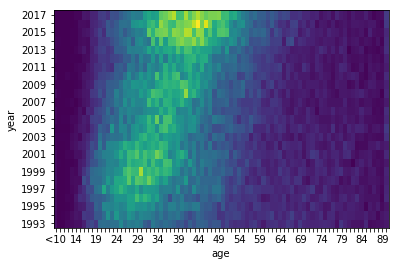

In [81]:
# https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe

plt.pcolor(df)
plt.yticks(numpy.arange(0.5, len(df.index), 1), df.index)
plt.xticks(numpy.arange(0.5, len(df.columns), 1), df.columns)
plt.xlabel('age')
plt.ylabel('year')
plt.setp(plt.gca().get_xticklabels()[1::5], visible=False)
plt.setp(plt.gca().get_xticklabels()[2::5], visible=False)
plt.setp(plt.gca().get_xticklabels()[3::5], visible=False)
plt.setp(plt.gca().get_xticklabels()[4::5], visible=False)
plt.setp(plt.gca().get_yticklabels()[1::2], visible=False)
#plt.setp(plt.gca().get_xticklabels()[::5], visible=False)
plt.show()